In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("train_ctrUa4K.csv")
testdata = pd.read_csv("test_lAUu6dG.csv")

In [3]:
data.shape

(614, 13)

In [4]:
testdata.shape

(367, 12)

In [5]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Data Cleaning


In [11]:
data_clone=data
data = data.drop(['Loan_ID'], axis = 1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
print('Gender: ' + str(data['Gender'].unique()))
print('Married: ' + str(data['Married'].unique()))
print('Dependents: '+ str(data['Dependents'].unique()))
print('Education: '+ str(data['Education'].unique()))
print('Self_Employed: '+ str(data['Self_Employed'].unique()))
print('Property_Area: '+ str(data['Property_Area'].unique()))

Gender: ['Male' 'Female' nan]
Married: ['No' 'Yes' nan]
Dependents: ['0' '1' '2' '3+' nan]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']


In [14]:
print('Loan status',data['Loan_Status'].value_counts())

Loan status Y    422
N    192
Name: Loan_Status, dtype: int64


In [15]:
data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

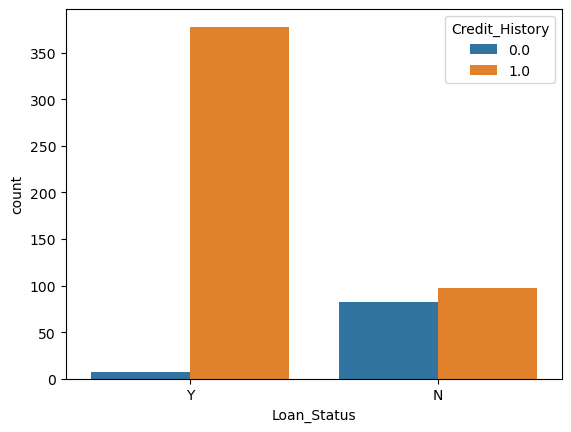

In [16]:
sns.countplot(data['Loan_Status'],hue=data['Credit_History'])

In [17]:
print(pd.crosstab(data['Credit_History'],data['Loan_Status']))

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


In [18]:
data['Credit_History']= data['Credit_History'].fillna(1.0)

In [19]:
print(pd.crosstab(data['Credit_History'],data['Loan_Status']))

Loan_Status       N    Y
Credit_History          
0.0              82    7
1.0             110  415


In [20]:
data['Self_Employed']= data['Self_Employed'].fillna('No')

In [21]:
data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

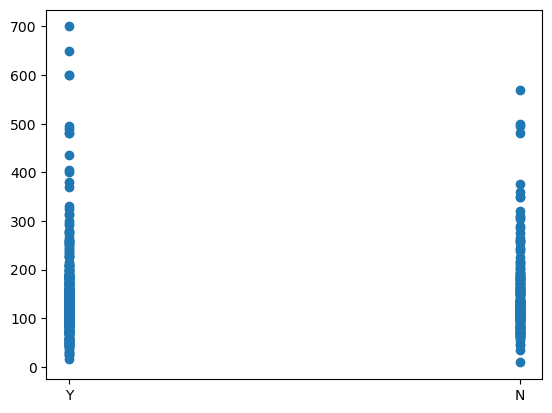

In [22]:
plt.scatter(data['Loan_Status'],data['LoanAmount'])

In [23]:
data['LoanAmount']=data['LoanAmount'].fillna(data.LoanAmount.mean())

In [24]:
data.isnull().sum().sort_values(ascending=False)

Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [26]:
data['Dependents']=data['Dependents'].fillna('0')

In [27]:
data['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [28]:
data.isnull().sum().sort_values(ascending=False)

Loan_Amount_Term     14
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [30]:
data['Loan_Amount_Term']=data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())

In [31]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [32]:
data['Gender']=data['Gender'].fillna('Male')

In [33]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [34]:
data['Married']=data['Married'].fillna('Yes')

{'whiskers': [<matplotlib.lines.Line2D at 0x1c24825ca60>,
 'caps': [<matplotlib.lines.Line2D at 0x1c24826c040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c24825c790>],
 'medians': [<matplotlib.lines.Line2D at 0x1c24826c5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c24826c8b0>],
 'means': []}

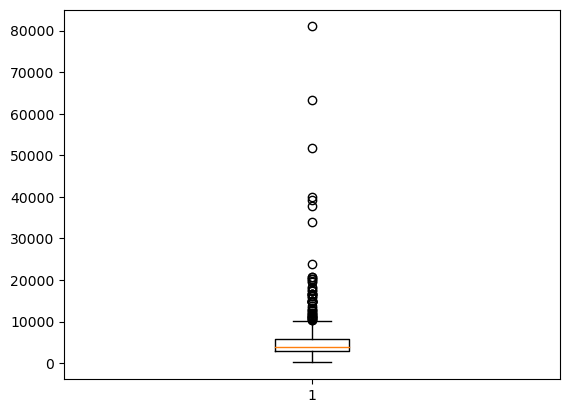

In [35]:
plt.boxplot(data['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2482c7fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2483545b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2482c7d00>],
 'medians': [<matplotlib.lines.Line2D at 0x1c248354b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c248354e20>],
 'means': []}

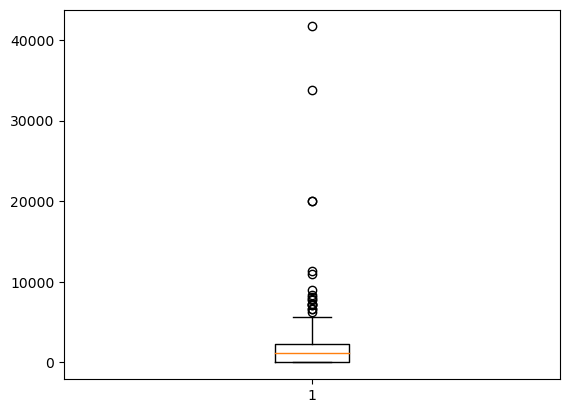

In [36]:
plt.boxplot(data['CoapplicantIncome'])

In [37]:
data['TotalIncome']= data['ApplicantIncome']+data['CoapplicantIncome']

In [38]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [39]:
#Finding any absurd values in Numeric Columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
data[numerical_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [40]:
#Creating Dataframe for correlation plot
data_clone1 = data
data['Loan_Status'].replace(to_replace='Y', value=1, inplace=True)
data['Loan_Status'].replace(to_replace='N',  value=0, inplace=True)
df_dummies = pd.get_dummies(data)
df_dummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,5849.0,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,6091.0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,3000.0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,4941.0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,6000.0,0,1,1,...,0,0,0,1,0,1,0,0,0,1


In [41]:
df_dummies.shape

(614, 22)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2483ccd00>,
 'caps': [<matplotlib.lines.Line2D at 0x1c2483d91f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2483cca30>],
 'medians': [<matplotlib.lines.Line2D at 0x1c2483d9790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c2483d9a60>],
 'means': []}

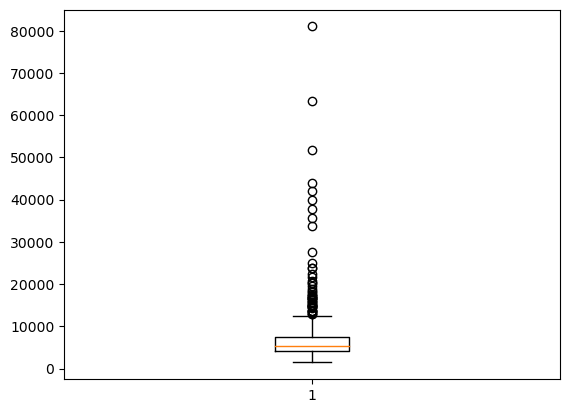

In [42]:
plt.boxplot(data['TotalIncome'])

<AxesSubplot:>

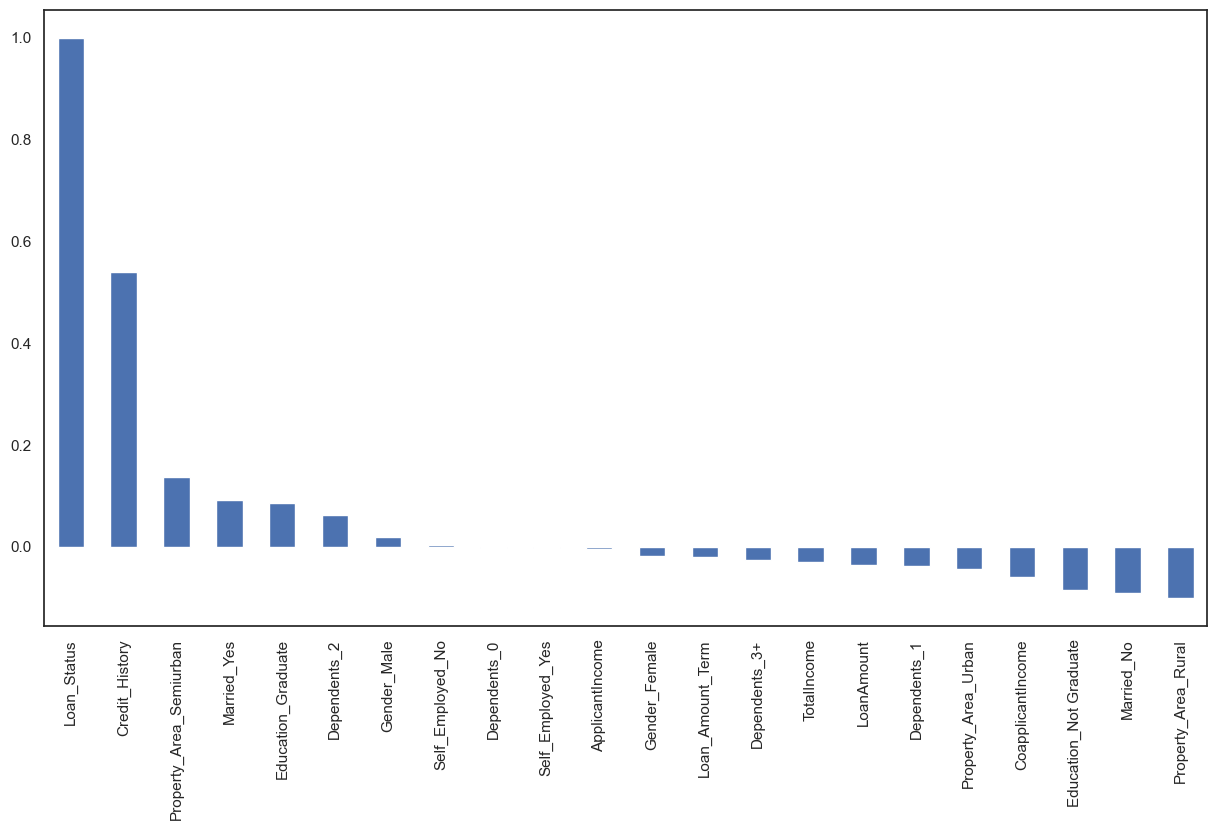

In [43]:
plt.figure(figsize=(15,8))
sns.set(style = 'white')

df_dummies.corr()['Loan_Status'].sort_values(ascending = False).plot(kind='bar')

In [44]:
 df_dummies[df_dummies["Credit_History"]==1][["Loan_Status","TotalIncome"]].value_counts()

Loan_Status  TotalIncome
1            6000.0         4
             4750.0         3
             2500.0         3
             3750.0         3
             7977.0         2
                           ..
             3652.0         1
             3625.0         1
             3618.0         1
             3617.0         1
             63337.0        1
Length: 494, dtype: int64

In [45]:
df_dummies.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,5849.0,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,6091.0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,3000.0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,4941.0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,6000.0,0,1,1,...,0,0,0,1,0,1,0,0,0,1


In [46]:
df_dummies.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Gender_Female,Gender_Male,Married_No,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,1,5849.0,0,1,1,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,6091.0,0,1,0,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,3000.0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,1,4941.0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,1,6000.0,0,1,1,...,0,0,0,1,0,1,0,0,0,1


In [47]:
y = df_dummies['Loan_Status']

In [48]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [49]:
X=df_dummies.drop(columns=['Loan_Status'])

In [50]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,5849.0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,6091.0,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,3000.0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,4941.0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,6000.0,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,2900.0,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,4106.0,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,8312.0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,7583.0,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction = rf_classifier.predict(X_test)

In [53]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.7317073170731707


In [54]:
model = RandomForestClassifier(n_estimators=300, criterion='entropy',max_features='sqrt',min_samples_leaf=10,random_state=100).fit(X_train,y_train)

In [55]:
prediction2 = model.predict(X_test)

In [56]:
print(accuracy_score(y_test,prediction2))

0.8292682926829268


In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [58]:
import xgboost as xgb

In [59]:
# Create an XGBoost regressor
xgb_reg = xgb.XGBRegressor(n_estimators=100, max_depth=10, learning_rate=0.1)

# Train the model
xgb_reg.fit(X_train, y_train)

# Evaluate the model on the testing set
score = xgb_reg.score(X_test, y_test)
print("Score: %.2f" % score)

Score: 0.15


In [60]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
metrics.confusion_matrix(y_test,prediction)

array([[17, 16],
       [17, 73]], dtype=int64)

In [61]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51        33
           1       0.82      0.81      0.82        90

    accuracy                           0.73       123
   macro avg       0.66      0.66      0.66       123
weighted avg       0.73      0.73      0.73       123



In [62]:
#Test Data Manipulation
testdata.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4805.599455,4910.685399,0.0,2864.00,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.00,1025.0,2430.5,24000.0
LoanAmount,362.0,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,342.537396,65.156643,6.0,360.00,360.0,360.0,480.0
Credit_History,338.0,0.825444,0.380150,0.0,1.00,1.0,1.0,1.0


In [63]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [64]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [65]:
testdata['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [66]:
testdata['Gender']=testdata['Gender'].fillna('Male')

In [67]:
testdata['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [68]:
testdata['Dependents']=testdata['Dependents'].fillna('0')

In [69]:
testdata['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [70]:
testdata['Self_Employed']=testdata['Self_Employed'].fillna('No')

In [71]:
testdata['LoanAmount']=testdata['LoanAmount'].fillna(testdata['LoanAmount'].mean())
testdata['Loan_Amount_Term']=testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mean())


In [72]:
testdata['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [73]:
testdata['Credit_History']= testdata['Credit_History'].fillna(1.0)

In [74]:
testdata['TotalIncome']= testdata['ApplicantIncome']+testdata['CoapplicantIncome']

In [75]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276


In [76]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1,6000.0


In [77]:
testdata = testdata.drop(['Loan_ID'], axis = 1)

In [78]:
testdata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276


In [79]:
data_clone1 = testdata
df_dummies_test = pd.get_dummies(testdata)
df_dummies_test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,5720,0,1,0,1,...,0,0,0,1,0,1,0,0,0,1
1,3076,1500,126.0,360.0,1.0,4576,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
2,5000,1800,208.0,360.0,1.0,6800,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
3,2340,2546,100.0,360.0,1.0,4886,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1
4,3276,0,78.0,360.0,1.0,3276,0,1,1,0,...,0,0,0,0,1,1,0,0,0,1


In [80]:
X1_test = df_dummies_test
y1_pred = rf_classifier.predict(X1_test)

In [81]:
y1_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [82]:
testdata["predicted_Loan_Status"] = y1_pred

In [83]:
testdata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,predicted_Loan_Status
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5720,1
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4576,1
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,6800,1
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4886,1
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,3276,1


In [84]:
sampledata = pd.read_csv("sample_submission_49d68Cx.csv")

In [85]:
sampledata.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [86]:
sampledata["Loan_Status"] = y1_pred

In [87]:
sampledata.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [88]:
sampledata.to_csv("D:\sampledata.csv", index=False)